### Below: HR Diagram
* Color
    - BP-RP
* Luminosity
    - (m-M) = 5log(d)-5

I decided to use the pleiades data from a parallax of 6.2 to 12.5 milliarcseconds because this would give me both stars on the cluster as well as a few off of it and I could see the difference.

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

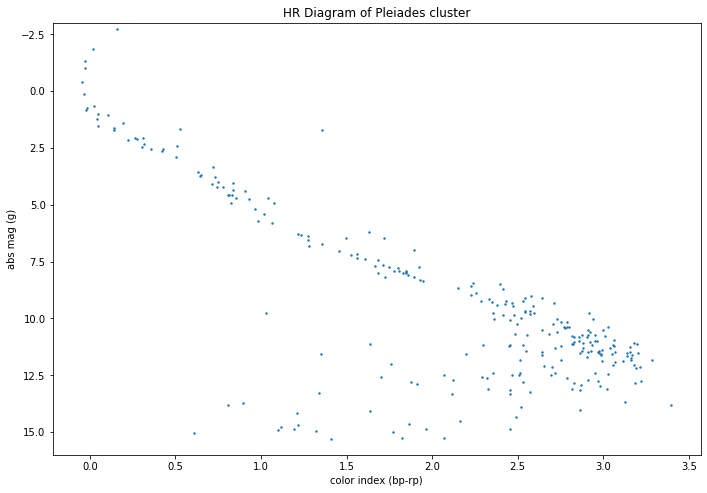

In [5]:
#color bp_rp
# x-axis pleiades_half['bp_rp']

#luminosity = absolute magnitude
def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

pleiades_half = pd.read_csv("pleiades6.2-12.5.csv")
pleiades_half.loc[:, 'parallax_arcsec'] = pleiades_half['parallax'].apply(lambda x: x*.001)
pleiades_half.loc[:, 'R'] = pleiades_half['parallax_arcsec'].apply(distance)
pleiades_half.loc[:, 'luminosity'] = pleiades_half.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
#pleiades_half.head(10)
plt.scatter(pleiades_half['bp_rp'], pleiades_half['luminosity'], s=2)
plt.ylim(16, -3)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of Pleiades cluster')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()

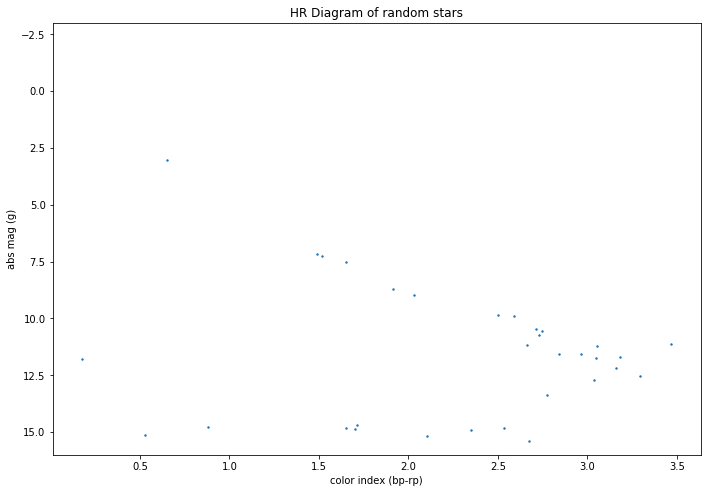

In [7]:
#random6.2-12.5.csv
random_half = pd.read_csv("random6.2-12.5.csv")
random_half.loc[:, 'parallax_arcsec'] = random_half['parallax'].apply(lambda x: x*.001)
random_half.loc[:, 'R'] = random_half['parallax_arcsec'].apply(distance)
random_half.loc[:, 'luminosity'] = random_half.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)

plt.scatter(random_half['bp_rp'], random_half['luminosity'], s=2)
plt.ylim(16, -3)
plt.xlabel("color index (bp-rp)")
plt.ylabel("abs mag (g)")
plt.title('HR Diagram of random stars')
plt.subplots_adjust(1.5, 1.5, 3, 3)
plt.show()